### Importamos librerías y funciones.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [13]:
import sys
sys.path.insert(1, '..')
from utils import functions as func

### Cargamos nuestros datos de entrenamiento y test

In [14]:
X_train, X_test, y_train, y_test = func.load_train_sets(path = "data\processed/train_set.npz")
X_train_corr, X_test_corr, y_train_corr, y_test_corr = func.load_train_sets(path = "data\processed/train_set_corr.npz")
X_train_norm, X_test_norm, y_train_norm, y_test_norm = func.load_train_sets(path = "data\processed/train_set_norm.npz")
X_norm_corr, X_norm_corr, y_norm_corr, y_norm_corr = func.load_train_sets(path = "data\processed/train_norm_corr.npz")

### Entrenamos modelos con tres valores de grados diferentes y todos nuestros conjuntos de datos

In [5]:
tipos_datos = {'todos': [X_train, X_test, y_train, y_test],'todos_norm':[X_train_norm, X_test_norm, y_train_norm, y_test_norm],
                'correlados': [X_train_corr, X_test_corr, y_train_corr, y_test_corr], 'corr y normalizados': [X_norm_corr, X_norm_corr, y_norm_corr, y_norm_corr]}

In [6]:
grados = [2,3,4]

In [7]:
for key in tipos_datos.keys():
    train_set, test_set = func.escala_estandar(train = tipos_datos[key][0], test = tipos_datos[key][1])
    for grado in grados:
        poly_feats = PolynomialFeatures(degree = grado)
        poly_feats.fit(train_set)
        X_poly = poly_feats.transform(train_set)
        X_poly_test = poly_feats.transform(test_set)
        pol_reg = LinearRegression()
        pol_reg.fit(X_poly, tipos_datos[key][2])
        if key == 'todos' or key == 'correlados':
            print(f'Score para {key} con {grado} grados:', metrics.r2_score(tipos_datos[key][3], pol_reg.predict(X_poly_test)))
        else:
            print(f'Score para {key} con {grado} grados:', metrics.r2_score(tipos_datos[key][3], (np.exp(pol_reg.predict(X_poly_test)) -1)))    
        

Score para todos con 2 grados: 0.896052999804445
Score para todos con 3 grados: 0.876937415671226
Score para todos con 4 grados: -267.47789806277495
Score para todos_norm con 2 grados: -19.32170512886382
Score para todos_norm con 3 grados: -15.28895023145585
Score para todos_norm con 4 grados: -17.134989220437028
Score para correlados con 2 grados: 0.8930284390869547
Score para correlados con 3 grados: 0.8967657321490108
Score para correlados con 4 grados: 0.8450499515611948
Score para corr y normalizados con 2 grados: -19.22930960460806
Score para corr y normalizados con 3 grados: -14.177492239850919
Score para corr y normalizados con 4 grados: -13.718895600742414


### El mejor score se ha obtenido con dos grados y con nuestros datos más correlados sin normalizar.

In [23]:
poly_feats_final = PolynomialFeatures(degree = 3)
poly_feats_final.fit(X_train_corr)
X_poly_final = poly_feats_final.transform(X_train_corr)
X_poly_test_final = poly_feats_final.transform(X_test_corr)
pol_reg_final = LinearRegression()
pol_reg_final.fit(X_poly_final, y_train_corr)

LinearRegression()

In [24]:
pred_log_final = pol_reg_final.predict(X_poly_test_final)

### Analizamos los resultados

In [15]:
#Mostramos métricas de nuestro modelo
func.muestra_metricas(data = y_test_corr, data_pred = pred_log_final)

MAE: 0.7350347585948428
MSE: 1.405183060558674
RMSE: 1.1854041760339271
R2 score: 0.8967657344065685


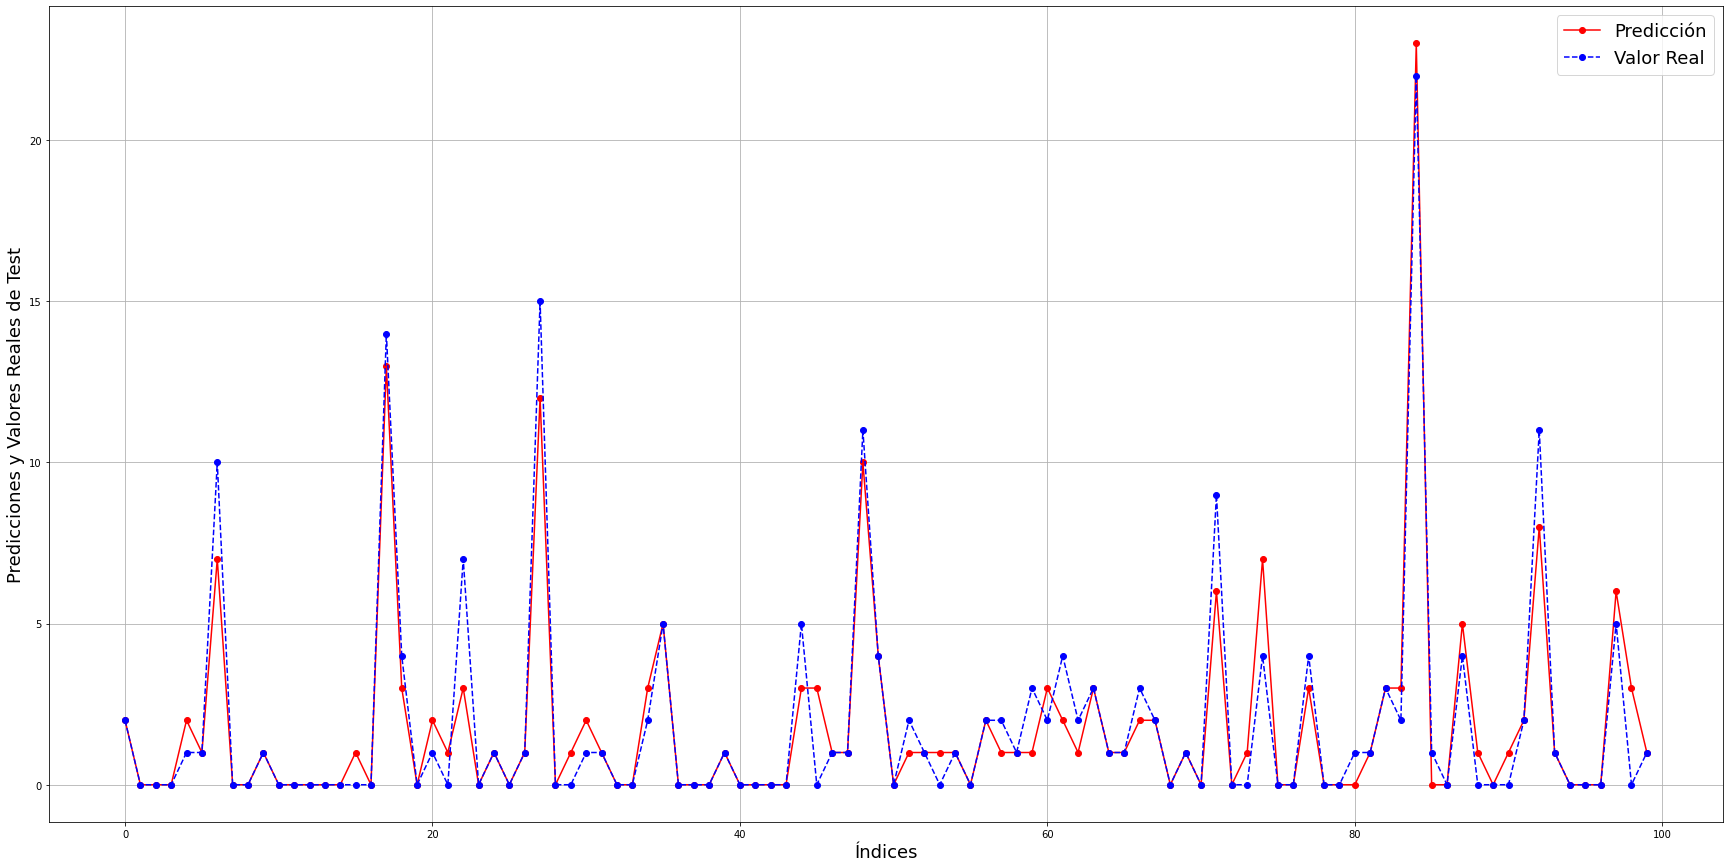

In [16]:
#Graficamos los resultados
func.muestra_pred(data = y_test_corr, data_pred = np.round(pred_log_final,0), long = 100, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\images\Regresión Polinómica Correlados.jpg" )

### Guardamos nuestro modelo

In [12]:
func.guarda_modelo(modelo = pred_log_final, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\models/poly_reg.model")

In [6]:
poly_feats_todos = PolynomialFeatures(degree = 3)
poly_feats_todos.fit(X_train)
X_poly_todos = poly_feats_todos.transform(X_train)
X_poly_test_todos = poly_feats_todos.transform(X_test)
pol_reg_todos = LinearRegression()
pol_reg_todos.fit(X_poly_todos, y_train)

LinearRegression()

In [7]:
pred_log_todos = pol_reg_todos.predict(X_poly_test_todos)

In [8]:
#Mostramos métricas de nuestro modelo
func.muestra_metricas(data = y_test, data_pred = pred_log_todos)

MAE: 0.7681136269924106
MSE: 1.6750780931901958
RMSE: 1.2942480802343095
R2 score: 0.8769374171836489


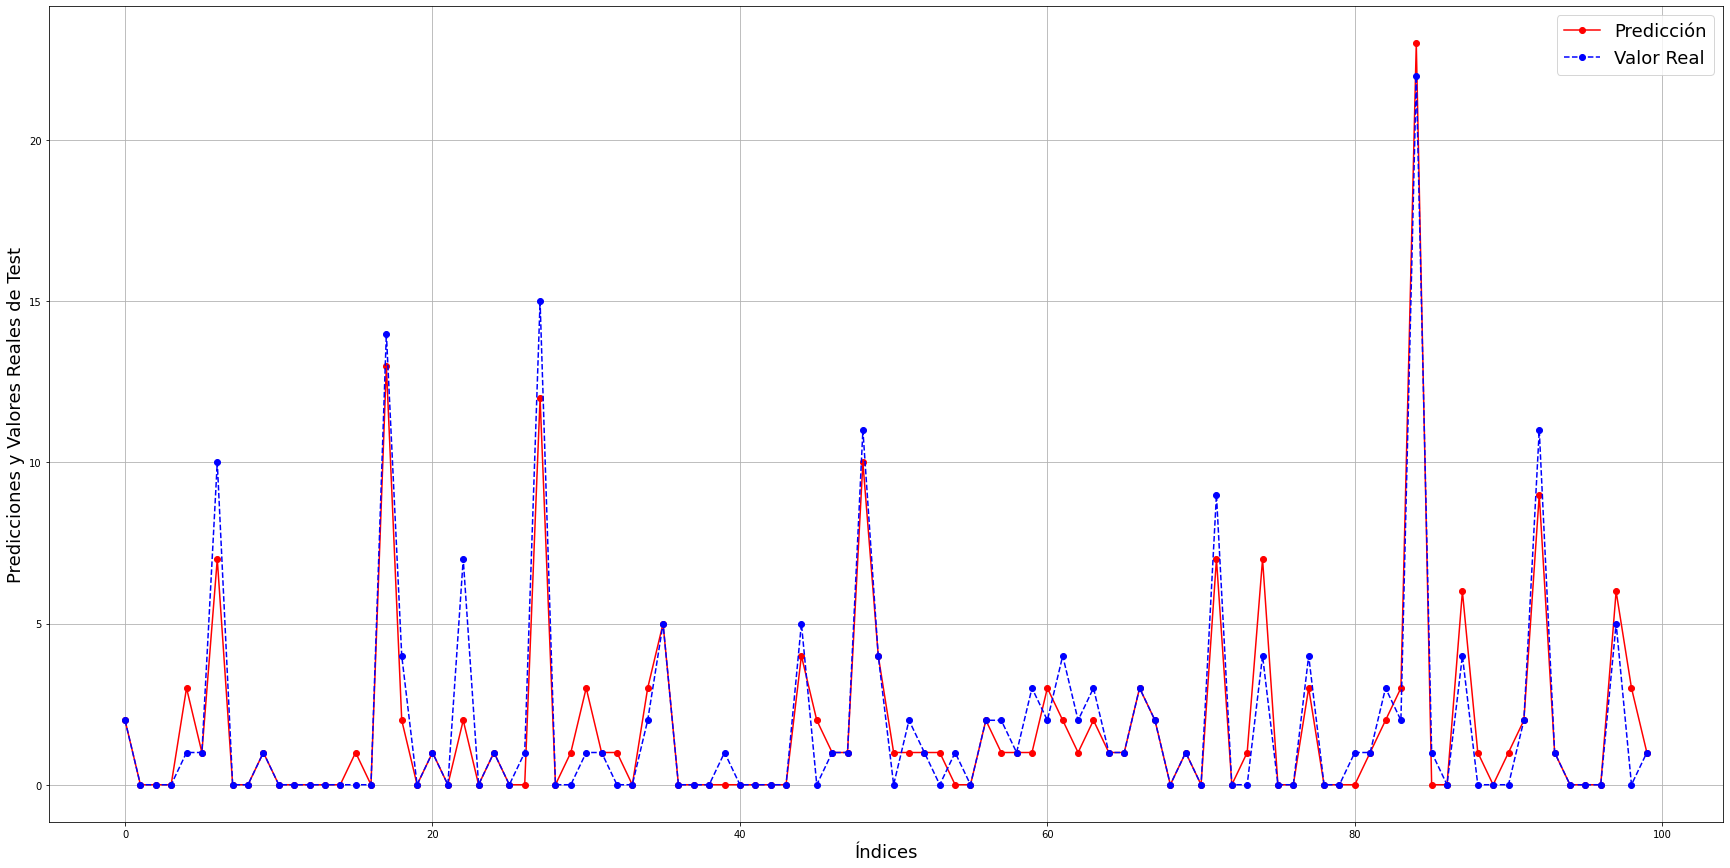

In [9]:
#Graficamos los resultados
func.muestra_pred(data = y_test, data_pred = np.round(pred_log_todos,0), long = 100, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\images\Regresión Polinómica Correlados Todos.jpg" )

In [26]:
dict_pred = {'Valor Real': y_test_corr[70:91],'Predicción': np.round(pred_log_final[70:91],0)}


In [27]:
df_prediccion = pd.DataFrame(dict_pred)

In [28]:
df_prediccion

,Valor Real,Predicción
0,0.0,-0.0
1,9.0,6.0
2,0.0,-0.0
3,0.0,1.0
4,4.0,7.0
5,0.0,0.0
6,0.0,0.0
7,4.0,3.0
8,0.0,0.0
9,0.0,-0.0


In [29]:
df_prediccion.to_csv('D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\processed\Prediciones poly_corr.csv', sep = ';')

In [18]:
poly_feats_norm = PolynomialFeatures(degree = 3)
poly_feats_norm.fit(X_train_norm_corr)
X_poly_norm = poly_feats_norm.transform(X_train_norm_corr)
X_poly_test_norm = poly_feats_norm.transform(X_test_norm_corr)
pol_reg_norm = LinearRegression()
pol_reg_norm.fit(X_poly_norm, y_train_norm_corr)

LinearRegression()

In [19]:
pred_log_norm = np.expm1(pol_reg_norm.predict(X_poly_test_norm))

In [20]:
func.muestra_metricas(data = y_test_corr, data_pred = pred_log_norm)

MAE: 0.7464041533811246
MSE: 1.564142698455063
RMSE: 1.2506569067714226
R2 score: 0.8850874826984194


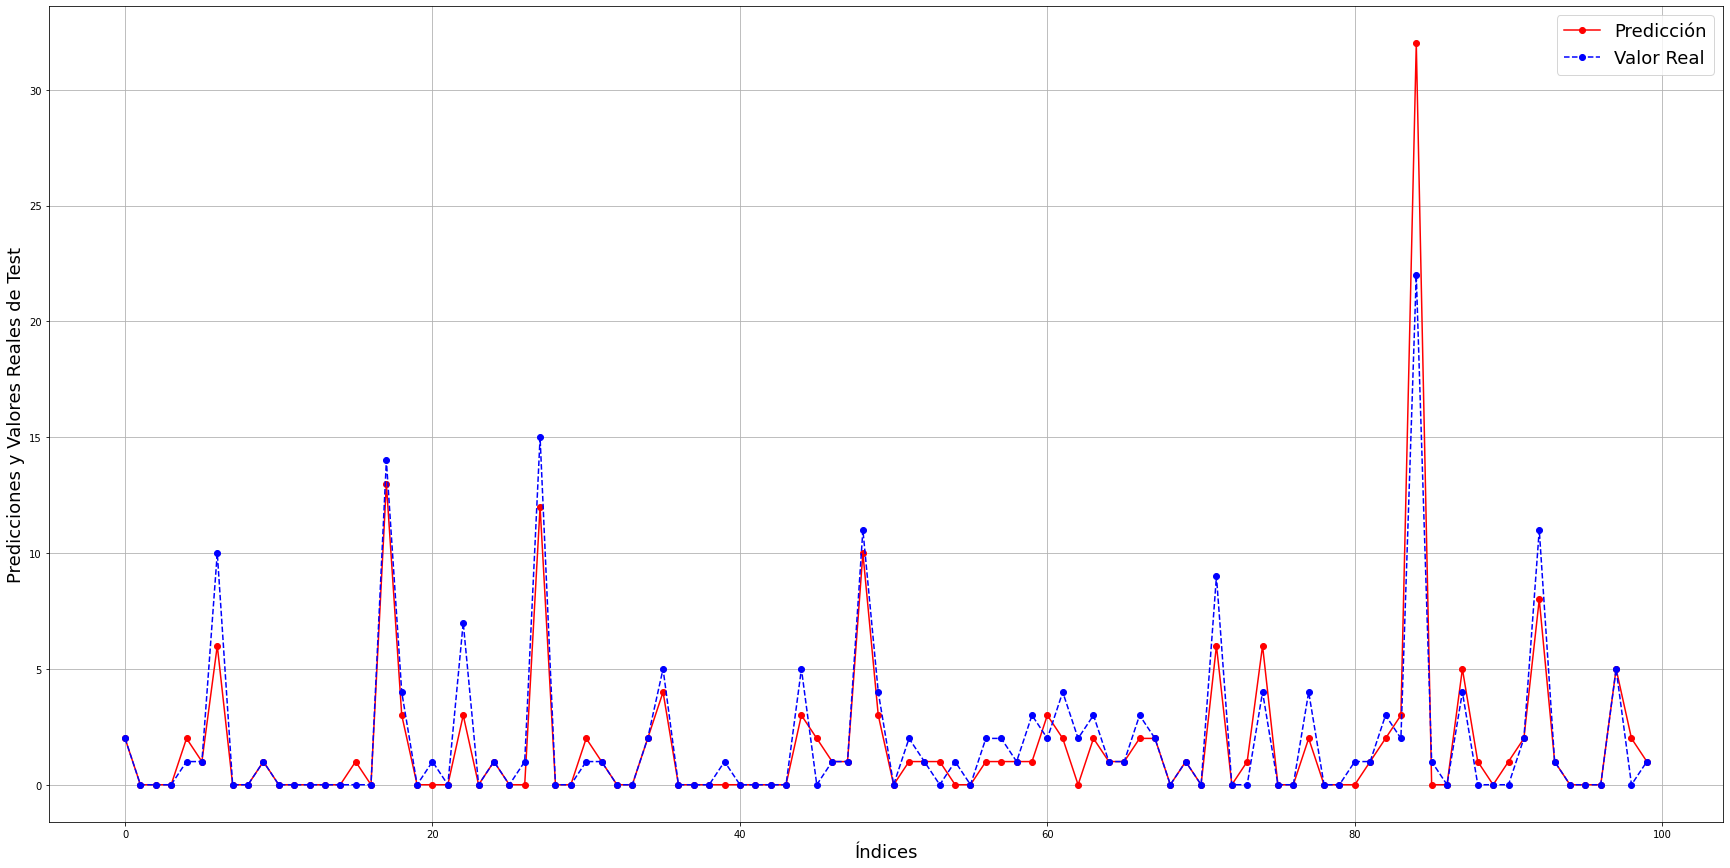

In [21]:
func.muestra_pred(data = y_test_corr, data_pred = np.round(pred_log_norm,0), long = 100, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\images\Regresión Polinómica Correlados Norm.jpg" )